SETUP

In [5]:
apikey = 'IRM0DTUUcVi2TJcPihrhw7dxPz91ioe6yzAICCerq8iUF5o797g93Krisb7UyLDa'
secret = 'Scu3eFLi5m6HihvFGtKKpjB14XxPNTWf8wKUO31DKTm8TNCBzquaXnNd1d0P0DTH'

In [2]:
!pip install python-binance pandas mplfinance

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for python-binance from https://files.pythonhosted.org/packages/fb/09/5f8c3c41d8771951ac1c8672292508b13776f6021fdc114af94f19633bb6/python_binance-1.0.19-py2.py3-none-any.whl.metadata
  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/293.8 kB ? eta -:--:--
     ------------------------------------- 293.8/293.8 kB 18.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/124.7 kB ? eta -:--:--
     ---------------------------------------- 124.7/124.7 kB ? eta 0:00:00
  Obtaining dependency information for pycryptodome from https://files.pythonhosted.org/packages/3f/a1/72ad8fbeb2630e74fa89622ab24ec0ce46dc93dc172156f1a112eb76c014/pycryptodome-3.18.0-cp35-abi3-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

Authenticate

In [6]:
client = Client(apikey, secret)

Get Tickers

In [7]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.06327000'},
 {'symbol': 'LTCBTC', 'price': '0.00245500'},
 {'symbol': 'BNBBTC', 'price': '0.00832600'},
 {'symbol': 'NEOBTC', 'price': '0.00026940'},
 {'symbol': 'QTUMETH', 'price': '0.00128200'},
 {'symbol': 'EOSETH', 'price': '0.00035660'},
 {'symbol': 'SNTETH', 'price': '0.00001293'},
 {'symbol': 'BNTETH', 'price': '0.00025280'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00008420'},
 {'symbol': 'BNBETH', 'price': '0.13160000'},
 {'symbol': 'BTCUSDT', 'price': '25815.51000000'},
 {'symbol': 'ETHUSDT', 'price': '1633.18000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000552'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [9]:
tickers[1]['symbol']

'LTCBTC'

In [12]:
ticker_df = pd.DataFrame(tickers)

In [15]:
ticker_df.tail()

,symbol,price
2285,CYBERUSDT,12.53000000
2286,CYBERTUSD,12.56200000
2287,SEITUSD,0.14360000
2288,LPTTRY,198.40000000
2289,UNITRY,117.30000000


In [16]:
ticker_df.set_index('symbol', inplace=True)

In [17]:
ticker_df.loc['BTCUSDT']

price    25815.51000000
Name: BTCUSDT, dtype: object

Get Depth

In [18]:
depth = client.get_order_book(symbol='BTCUSDT')

In [19]:
depth

{'lastUpdateId': 38618178812,
 'bids': [['25798.69000000', '4.46092000'],
  ['25798.44000000', '0.05144000'],
  ['25798.31000000', '0.00129000'],
  ['25798.29000000', '0.00132000'],
  ['25798.21000000', '0.00101000'],
  ['25798.09000000', '2.27746000'],
  ['25798.03000000', '0.00042000'],
  ['25798.01000000', '1.53717000'],
  ['25798.00000000', '4.08113000'],
  ['25797.77000000', '0.00042000'],
  ['25797.66000000', '0.01126000'],
  ['25797.51000000', '0.00042000'],
  ['25797.44000000', '0.00058000'],
  ['25797.43000000', '0.04938000'],
  ['25797.41000000', '0.00063000'],
  ['25797.39000000', '0.11387000'],
  ['25797.27000000', '0.00481000'],
  ['25797.26000000', '0.07200000'],
  ['25797.25000000', '0.00042000'],
  ['25797.10000000', '0.00050000'],
  ['25797.00000000', '0.28475000'],
  ['25796.99000000', '0.00042000'],
  ['25796.77000000', '0.17416000'],
  ['25796.76000000', '0.04000000'],
  ['25796.73000000', '0.00042000'],
  ['25796.71000000', '0.00510000'],
  ['25796.69000000', '0.00

In [23]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,25798.70000000,15.99618000
1,25798.80000000,0.55016000
2,25798.81000000,0.00042000
3,25798.82000000,0.01373000
4,25798.92000000,0.40201000


Get Histrocial Data

In [32]:
historical = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2020')

In [33]:
historical

[[1577836800000,
  '7195.24000000',
  '7255.00000000',
  '7175.15000000',
  '7200.85000000',
  '16792.38816500',
  1577923199999,
  '121214452.11606228',
  194010,
  '8946.95553500',
  '64597785.21233434',
  '0'],
 [1577923200000,
  '7200.77000000',
  '7212.50000000',
  '6924.74000000',
  '6965.71000000',
  '31951.48393200',
  1578009599999,
  '225982341.30114030',
  302667,
  '15141.61134000',
  '107060829.07806464',
  '0'],
 [1578009600000,
  '6965.49000000',
  '7405.00000000',
  '6871.04000000',
  '7344.96000000',
  '68428.50045100',
  1578095999999,
  '495098582.96203543',
  519854,
  '35595.49627300',
  '257713113.85172859',
  '0'],
 [1578096000000,
  '7345.00000000',
  '7404.00000000',
  '7272.21000000',
  '7354.11000000',
  '29987.97497700',
  1578182399999,
  '219874240.93994811',
  279370,
  '16369.38224800',
  '120035111.72407165',
  '0'],
 [1578182400000,
  '7354.19000000',
  '7495.00000000',
  '7318.00000000',
  '7358.75000000',
  '38331.08560400',
  1578268799999,
  '28484

In [34]:
hist_df = pd.DataFrame(historical)

In [36]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [37]:
hist_df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1577836800000,7195.24000000,7255.00000000,7175.15000000,7200.85000000,16792.38816500,1577923199999,121214452.11606228,194010,8946.95553500,64597785.21233434,0
1,1577923200000,7200.77000000,7212.50000000,6924.74000000,6965.71000000,31951.48393200,1578009599999,225982341.30114030,302667,15141.61134000,107060829.07806464,0
2,1578009600000,6965.49000000,7405.00000000,6871.04000000,7344.96000000,68428.50045100,1578095999999,495098582.96203543,519854,35595.49627300,257713113.85172859,0
3,1578096000000,7345.00000000,7404.00000000,7272.21000000,7354.11000000,29987.97497700,1578182399999,219874240.93994811,279370,16369.38224800,120035111.72407165,0
4,1578182400000,7354.19000000,7495.00000000,7318.00000000,7358.75000000,38331.08560400,1578268799999,284848683.78917621,329209,19455.36956400,144600094.38965074,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1336,1693267200000,26120.00000000,28142.85000000,25922.00000000,27716.34000000,74251.99488000,1693353599999,2023326050.75847910,1137083,37945.55071000,1034244032.38146630,0
1337,1693353600000,27716.34000000,27768.57000000,27017.24000000,27299.99000000,35448.25848000,1693439999999,969086451.16252570,690292,16715.57712000,456926409.72973200,0
1338,1693440000000,27299.99000000,27587.51000000,25655.01000000,25940.78000000,51032.80401000,1693526399999,1360373186.01167090,944690,24598.11397000,655707233.88490080,0
1339,1693526400000,25940.77000000,26156.00000000,25333.75000000,25805.05000000,41032.15056000,1693612799999,1059444591.70974940,881179,19960.99030000,515429946.18317240,0


In [38]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

Preprocess Historical Data

In [49]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

In [53]:
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

In [56]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [58]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis =1)

In [59]:
hist_df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2020-01-01,7195.24,7255.00,7175.15,7200.85,16792.388165,2020-01-01 23:59:59.999000064,1.212145e+08,194010,8946.955535,6.459779e+07,0
1,2020-01-02,7200.77,7212.50,6924.74,6965.71,31951.483932,2020-01-02 23:59:59.999000064,2.259823e+08,302667,15141.611340,1.070608e+08,0
2,2020-01-03,6965.49,7405.00,6871.04,7344.96,68428.500451,2020-01-03 23:59:59.999000064,4.950986e+08,519854,35595.496273,2.577131e+08,0
3,2020-01-04,7345.00,7404.00,7272.21,7354.11,29987.974977,2020-01-04 23:59:59.999000064,2.198742e+08,279370,16369.382248,1.200351e+08,0
4,2020-01-05,7354.19,7495.00,7318.00,7358.75,38331.085604,2020-01-05 23:59:59.999000064,2.848487e+08,329209,19455.369564,1.446001e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1336,2023-08-29,26120.00,28142.85,25922.00,27716.34,74251.994880,2023-08-29 23:59:59.999000064,2.023326e+09,1137083,37945.550710,1.034244e+09,0
1337,2023-08-30,27716.34,27768.57,27017.24,27299.99,35448.258480,2023-08-30 23:59:59.999000064,9.690865e+08,690292,16715.577120,4.569264e+08,0
1338,2023-08-31,27299.99,27587.51,25655.01,25940.78,51032.804010,2023-08-31 23:59:59.999000064,1.360373e+09,944690,24598.113970,6.557072e+08,0
1339,2023-09-01,25940.77,26156.00,25333.75,25805.05,41032.150560,2023-09-01 23:59:59.999000064,1.059445e+09,881179,19960.990300,5.154299e+08,0


In [60]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [61]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1.341000e+03,1.341000e+03,1341.000000,1.341000e+03
mean,28404.449329,29132.466450,27593.621350,28418.455451,102278.243499,2.547946e+09,2.223558e+06,50542.576643,1.259604e+09
std,15572.450419,16015.560247,15046.260614,15561.925153,100386.770740,2.274373e+09,2.312071e+06,50139.373121,1.133450e+09
min,4800.010000,5365.420000,3782.130000,4800.000000,3453.847820,8.908711e+07,1.218760e+05,1757.985510,4.534564e+07
25%,16603.110000,16785.190000,16361.600000,16607.480000,43761.643110,8.736300e+08,8.395210e+05,21468.606020,4.234396e+08
50%,26705.930000,27150.000000,26125.010000,26705.920000,64566.421908,1.932344e+09,1.331655e+06,31641.497350,9.531530e+08
75%,39850.270000,40959.880000,38573.180000,39845.440000,115189.672770,3.405502e+09,2.369698e+06,56660.201961,1.694326e+09
max,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783,1.746531e+10,1.522359e+07,374775.574085,8.783916e+09


In [62]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           1341 non-null   datetime64[ns]
 1   Open                1341 non-null   float64       
 2   High                1341 non-null   float64       
 3   Low                 1341 non-null   float64       
 4   Close               1341 non-null   float64       
 5   Volume              1341 non-null   float64       
 6   Close Time          1341 non-null   datetime64[ns]
 7   Quote Asset Volume  1341 non-null   float64       
 8   Number of Trades    1341 non-null   int64         
 9   TB Base Volume      1341 non-null   float64       
 10  TB Quote Volume     1341 non-null   float64       
 11  Ignore              1341 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 125.8+ KB


Visualize

In [63]:
import mplfinance as mpf

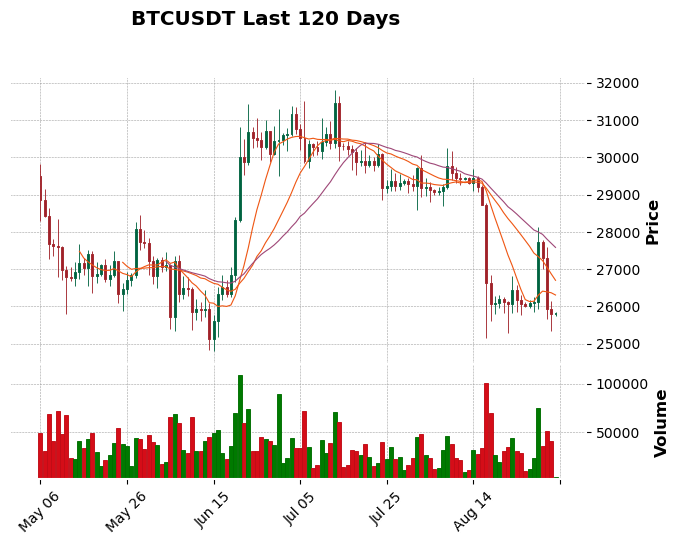

In [81]:
mpf.plot(hist_df.set_index('Close Time').tail(120), type='candle', style='charles', volume=True, title="BTCUSDT Last 120 Days", mav=(10,20,30))